In [36]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
img_size=(64,64)
dataset_path = 'C:/Users/Princia/Downloads/archive (3)/PetImages'
def load_images(folder,label):
    images=[]
    labels=[]
    for file in os.listdir(folder):
        img=cv2.imread(os.path.join(folder,file))
        if img is not None:
            img=cv2.resize(img,img_size)
            img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            images.append(img)
            labels.append(label)
    return images,labels



In [3]:
cat_images,cat_labels=load_images('C:/Users/Princia/Downloads/archive (3)/PetImages/Cat',label=0)
        

In [4]:
dog_images,dog_labels=load_images('C:/Users/Princia/Downloads/archive (3)/PetImages/Dog',label=1)

In [5]:
images=np.array(dog_images+cat_images)
labels=np.array(dog_labels+cat_labels)

In [6]:
images=images/255.0

In [8]:
from skimage.feature import hog
def extract_hog_features(images):
    hog_features = []
    for image in images:
        features, _ = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        hog_features.append(features)
    return np.array(hog_features)

hog_features = extract_hog_features(images)


C:\Users\Princia\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [9]:
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)

In [10]:
svm_clf = SVC(kernel='linear')

In [11]:
svm_clf.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svm_clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model: {accuracy * 100:.2f}%')

In [17]:
def new_image(image_path):
    img=cv2.imread(image_path)
    if img is not None:
        img=cv2.resize(img,img_size)
        img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img=img/255.0
        hog_features,_=hog(img,pixels_per_cell=(8,8),cells_per_block=(2,2),visualize=True)
        return np.array(hog_features)
    else:
        print("Not an image")

In [26]:
def predict_image(image_path,svm_clf):
    features=new_image(image_path)
    features=features.reshape(1,-1)
    prediction=svm_clf.predict(features)
    if prediction[0]==0:
        return "Cat"
    else:
        return "Dog"
            

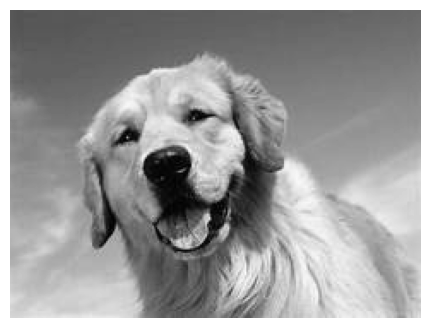

Predicted label for the image is Dog


In [42]:
#image_path="C:/Users/Princia/OneDrive/Pictures/cat vs dog.jpg"
image_path="C:/Users/Princia/OneDrive/Pictures/cat vs dog.jpg"
plt.figure(figsize=(6,4))
image=cv2.imread(image_path)
gray_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image,cmap='gray')
plt.axis('Off')
plt.show()
prediction=predict_image(image_path,svm_clf)
print("Predicted label for the image is",prediction)
